In [6]:
%load_ext autoreload
%autoreload 2

In [14]:
import os
import pickle
import sys
from pathlib import Path

import lab.torch as B
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch
from wbml import plot
import tueplots

# torch.set_printoptions(precision=8, sci_mode=False, edgeitems=5)
torch.set_printoptions(profile='full') # 'short'

colors = sns.color_palette("bright")
sns.set_style("whitegrid")
sns.set_palette(colors)

matplotlib.rcParams["figure.dpi"] = 300  # for high quality, retina plots

from tueplots import bundles, fontsizes, figsizes

from wbml import experiment, out, plot

In [16]:
dataset = "Adult"

seq_exps = {'mfvi': "draft_results/Adult/Seq/07-24-10.12.05_seq-mfvi-adult-10c-10g-1000l-nealprior-128b-0-02lr-2s-equaltogi", 
                'gi': "draft_results/Adult/Seq/07-24-10.11.10_seq-pvi-adult-10c-10g-1000l-nealprior-128b-0-02lr-2s-100m-project-tight"}

sync_exps = {'mfvi': "draft_results/Adult/Sync/07-24-12.41.48_sync-mfvi-adult-10c-10g-1000l-nealprior-128b-0-02lr-2s", 
                'gi': "draft_results/Adult/Sync/07-24-12.41.02_sync-pvi-adult-10c-10g-1000l-nealprior-128b-0-02lr-2s-100m"}

gvi_exps = {'mfvi':"draft_results/Adult/GVI/07-24-13.50.19_sync-mfvi-adult-1c-10g-1000l-nealprior-128b-0-02lr-2s-gvi", 
                'gi':"draft_results/Adult/GVI/07-24-14.46.53_seq-pvi-adult-1c-10g-1000l-nealprior-128b-0-02lr-2s-100m-gvi"}

exps = {'seq': seq_exps, 'sync': sync_exps, 'gvi': gvi_exps}

In [17]:
for v, exp in exps.items():
    for k, e in exp.items():
        main_dir = os.path.dirname(os.path.abspath(os.getcwd()))
        exp[k] = os.path.join(main_dir, e, "metrics")

In [32]:
pvi_setting = "PVI"
variational_method = "Method"
client_name = "Client"
logs = {}
for v, exp in exps.items():
    logs[v] = {}
    for k, e in exp.items():
        logs[v][k] = {}
        for log_name in os.listdir(e):
            
            name = log_name.split('_')[0]
            logs[v][k][name] = pd.read_csv(os.path.join(e, log_name))
            
            logs[v][k][name][pvi_setting] = v.upper()
            logs[v][k][name][variational_method] = k.upper()
            if name != 'server':
                logs[v][k][name][client_name] = name


Merge dataframes for plotting purposes.

In [38]:
clients = []
for v, exp in logs.items():
    for k, e in exp.items():
        for name, log in e.items():
            if name != 'server': clients.append(log)

client = pd.concat(clients, ignore_index=True)

In [28]:
servers = []
for v, exp in logs.items():
    for k, e in exp.items():
        servers.append(e['server'])

server = pd.concat(servers, ignore_index=True)

Plot test mll and accuracy

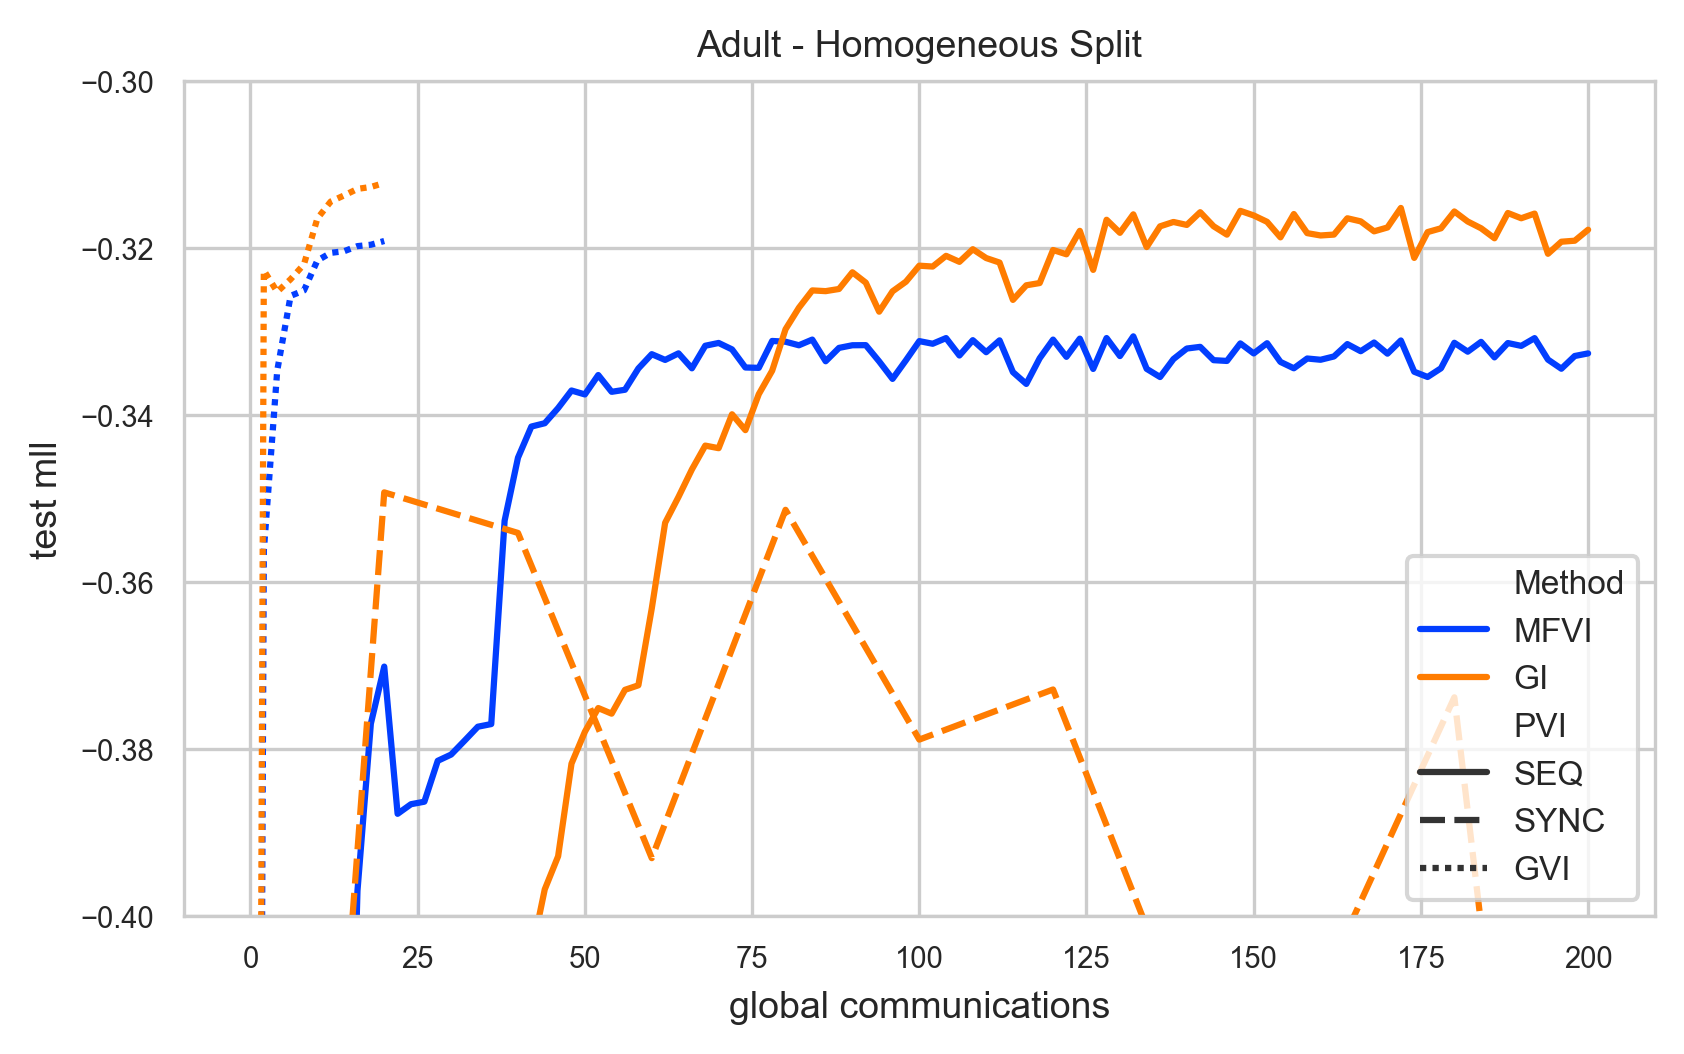

In [30]:

with plt.rc_context({**figsizes.neurips2022(ncols=1), **fontsizes.neurips2022()}):
    fig, ax = plt.subplots(1, 1)

    sns.lineplot(data=server, x='communications', y='test_mll', ax=ax, hue=variational_method, style=pvi_setting)
    
    ax.set_title(f'{dataset} - Homogeneous Split')
    ax.set_ylim(-.4, -0.3)
    ax.set_ylabel('test mll')
    ax.set_xlabel('global communications')
    ax.legend(loc="lower right", prop={"size": 8})
    plt.show()

Accuracy

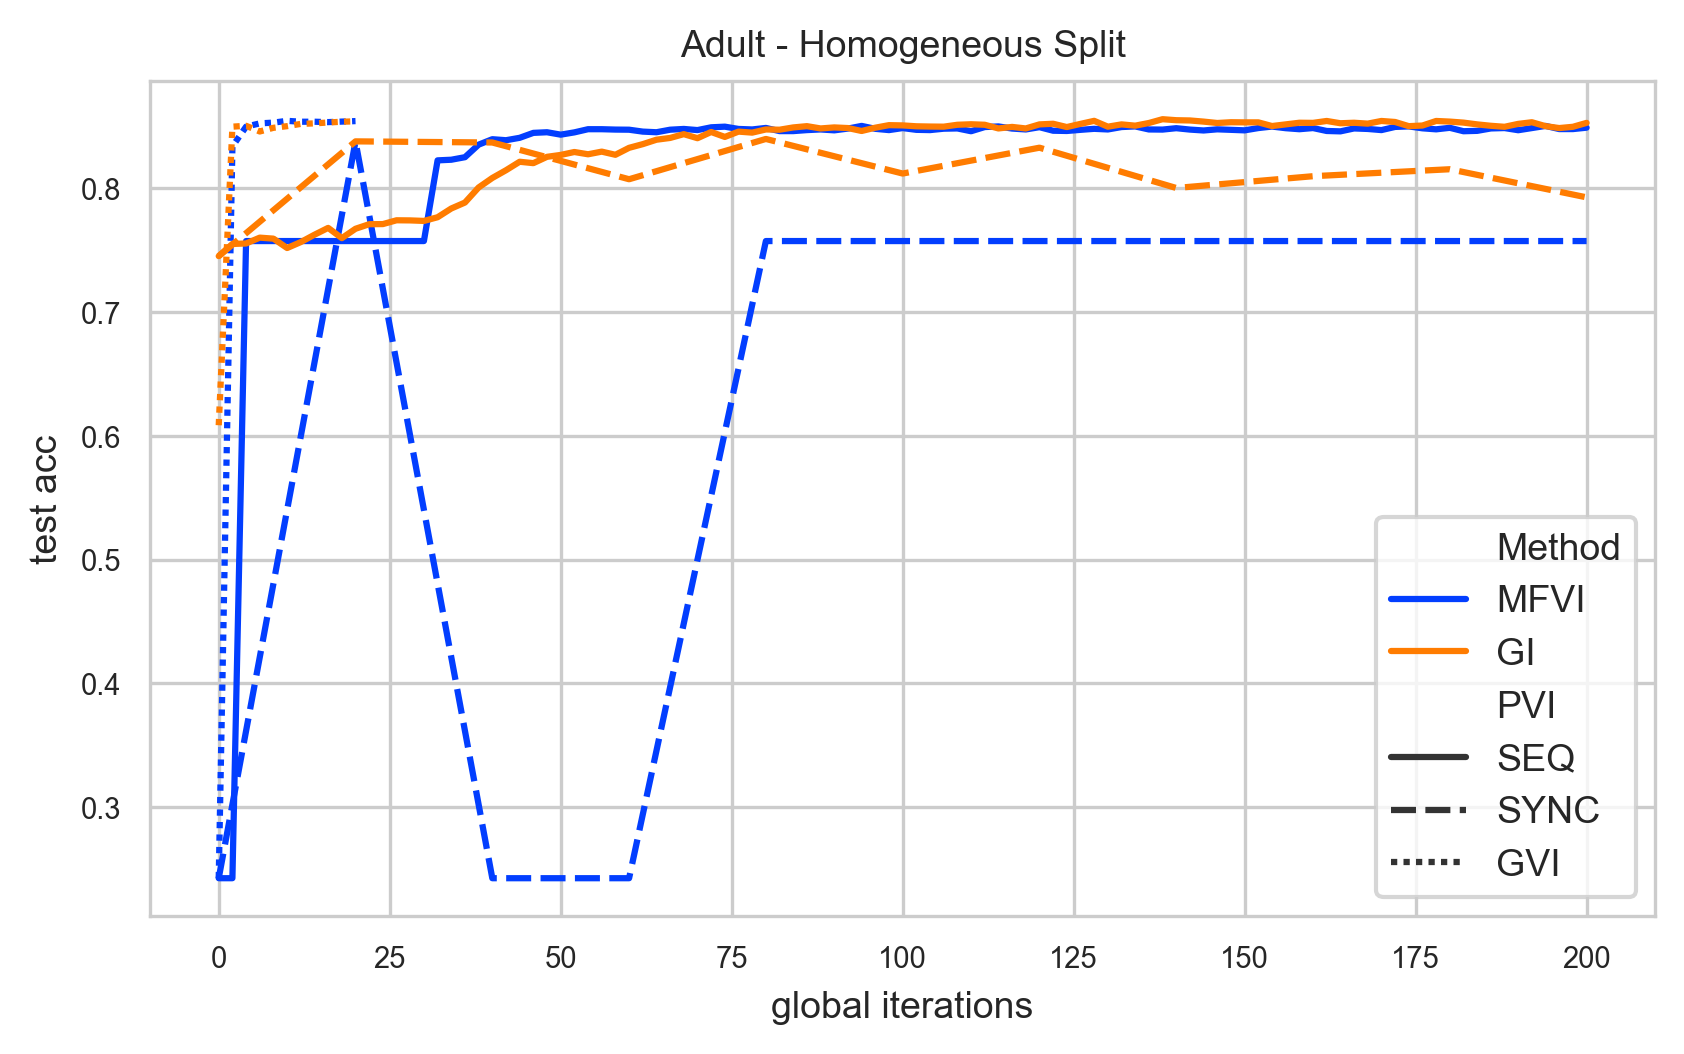

In [51]:
with plt.rc_context({**figsizes.neurips2022(ncols=1), **fontsizes.neurips2022()}):
    fig, ax = plt.subplots(1, 1)

    sns.lineplot(data=server, x='communications', y='test_acc', ax=ax, hue=variational_method, style=pvi_setting)
    
    ax.set_title(f'{dataset} - Homogeneous Split')
    # ax.set_ylim((0.80))
    ax.set_ylabel('test acc')
    ax.set_xlabel('global iterations')
    ax.legend(loc="lower right", prop={"size": 9})
    plt.show()

In [40]:
client

,global_iteration,local_iteration,total_iteration,vfe,ll,kl,error,PVI,Method,Client
0,4,0,4000,-4.003162,-0.683145,12971.306641,0.265625,SEQ,MFVI,client4
1,4,49,4049,-3.898394,-0.680459,12572.474609,0.257812,SEQ,MFVI,client4
2,4,99,4099,-3.861374,-0.679023,12433.444336,0.257812,SEQ,MFVI,client4
3,4,149,4149,-3.846992,-0.679876,12373.923828,0.289062,SEQ,MFVI,client4
4,4,199,4199,-3.835559,-0.676461,12342.595703,0.250000,SEQ,MFVI,client4
...,...,...,...,...,...,...,...,...,...,...
8815,9,799,9799,-0.338786,-0.326555,477.885986,0.140625,GVI,GI,client0
8816,9,849,9849,-0.296500,-0.284313,476.173584,0.125000,GVI,GI,client0
8817,9,899,9899,-0.365244,-0.352918,481.633392,0.179688,GVI,GI,client0
8818,9,949,9949,-0.273709,-0.261543,475.376068,0.101562,GVI,GI,client0


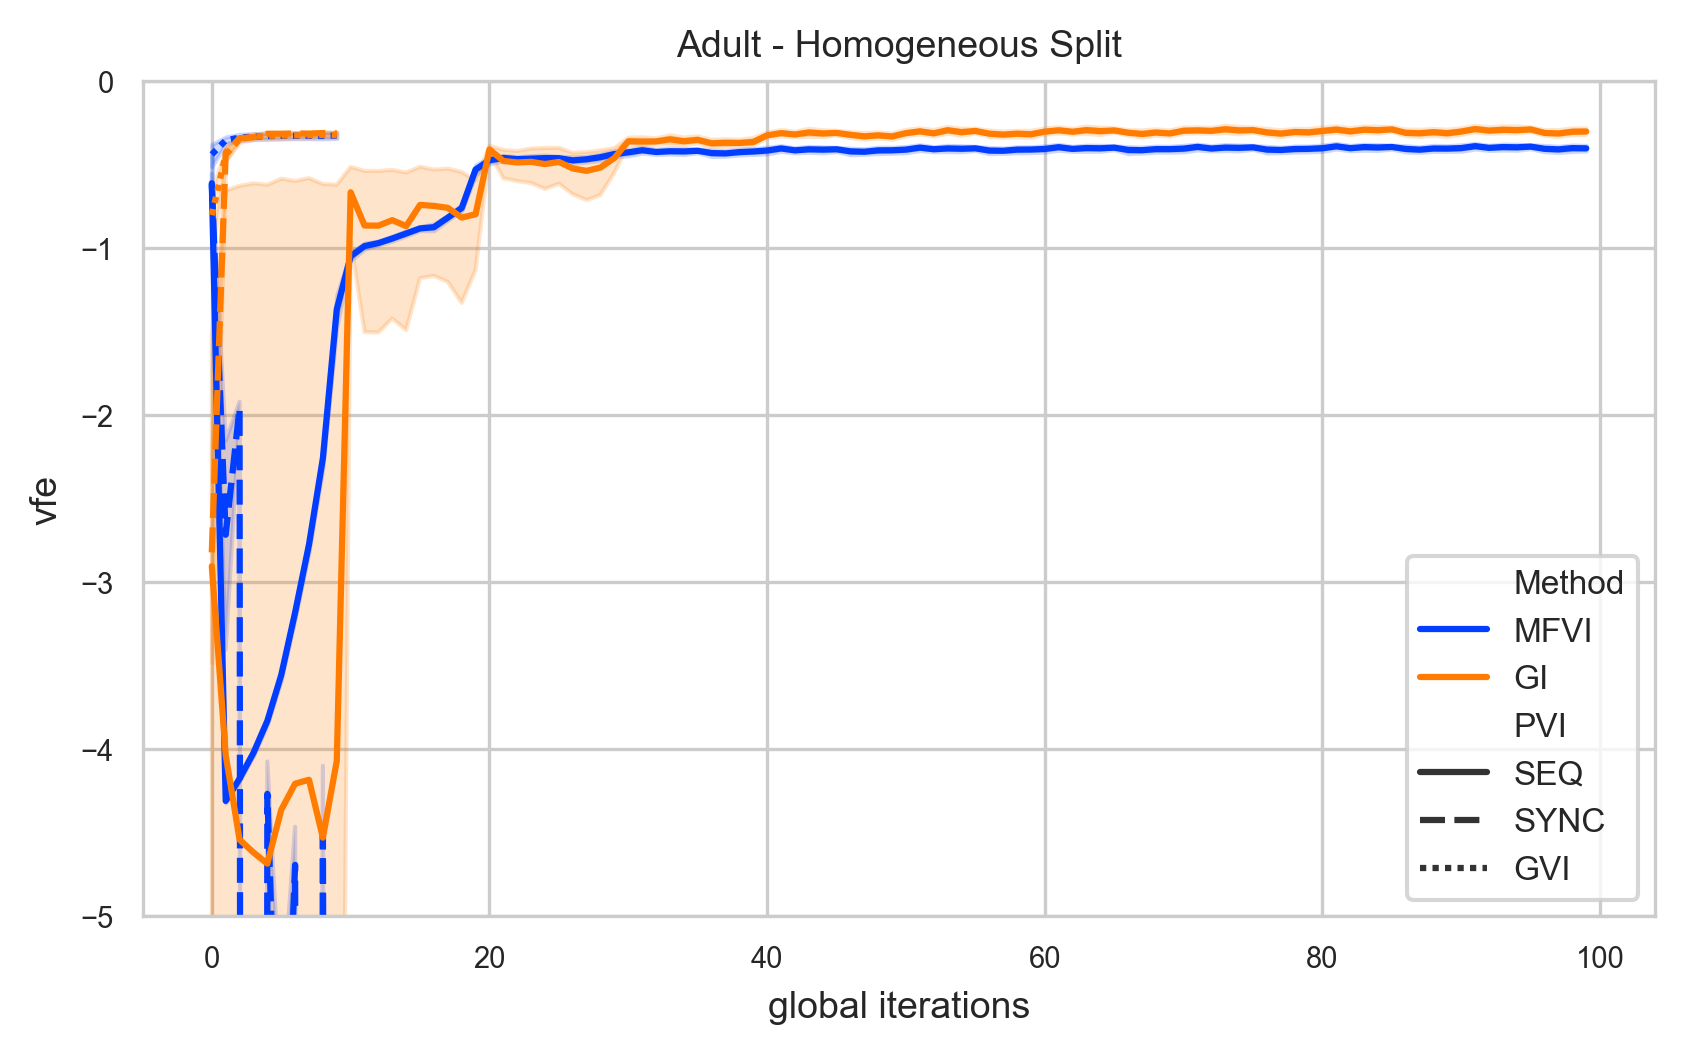

In [48]:
with plt.rc_context({**figsizes.neurips2022(ncols=1), **fontsizes.neurips2022()}):
    fig, ax = plt.subplots(1, 1)

    sns.lineplot(data=client, x='global_iteration', y='vfe', ax=ax, hue=variational_method, style=pvi_setting)
    
    ax.set_title(f'{dataset} - Homogeneous Split')
    ax.set_ylim(-5, 0)
    ax.set_ylabel('vfe')
    ax.set_xlabel('global iterations')
    ax.legend(loc="lower right", prop={"size": 8})
    plt.show()

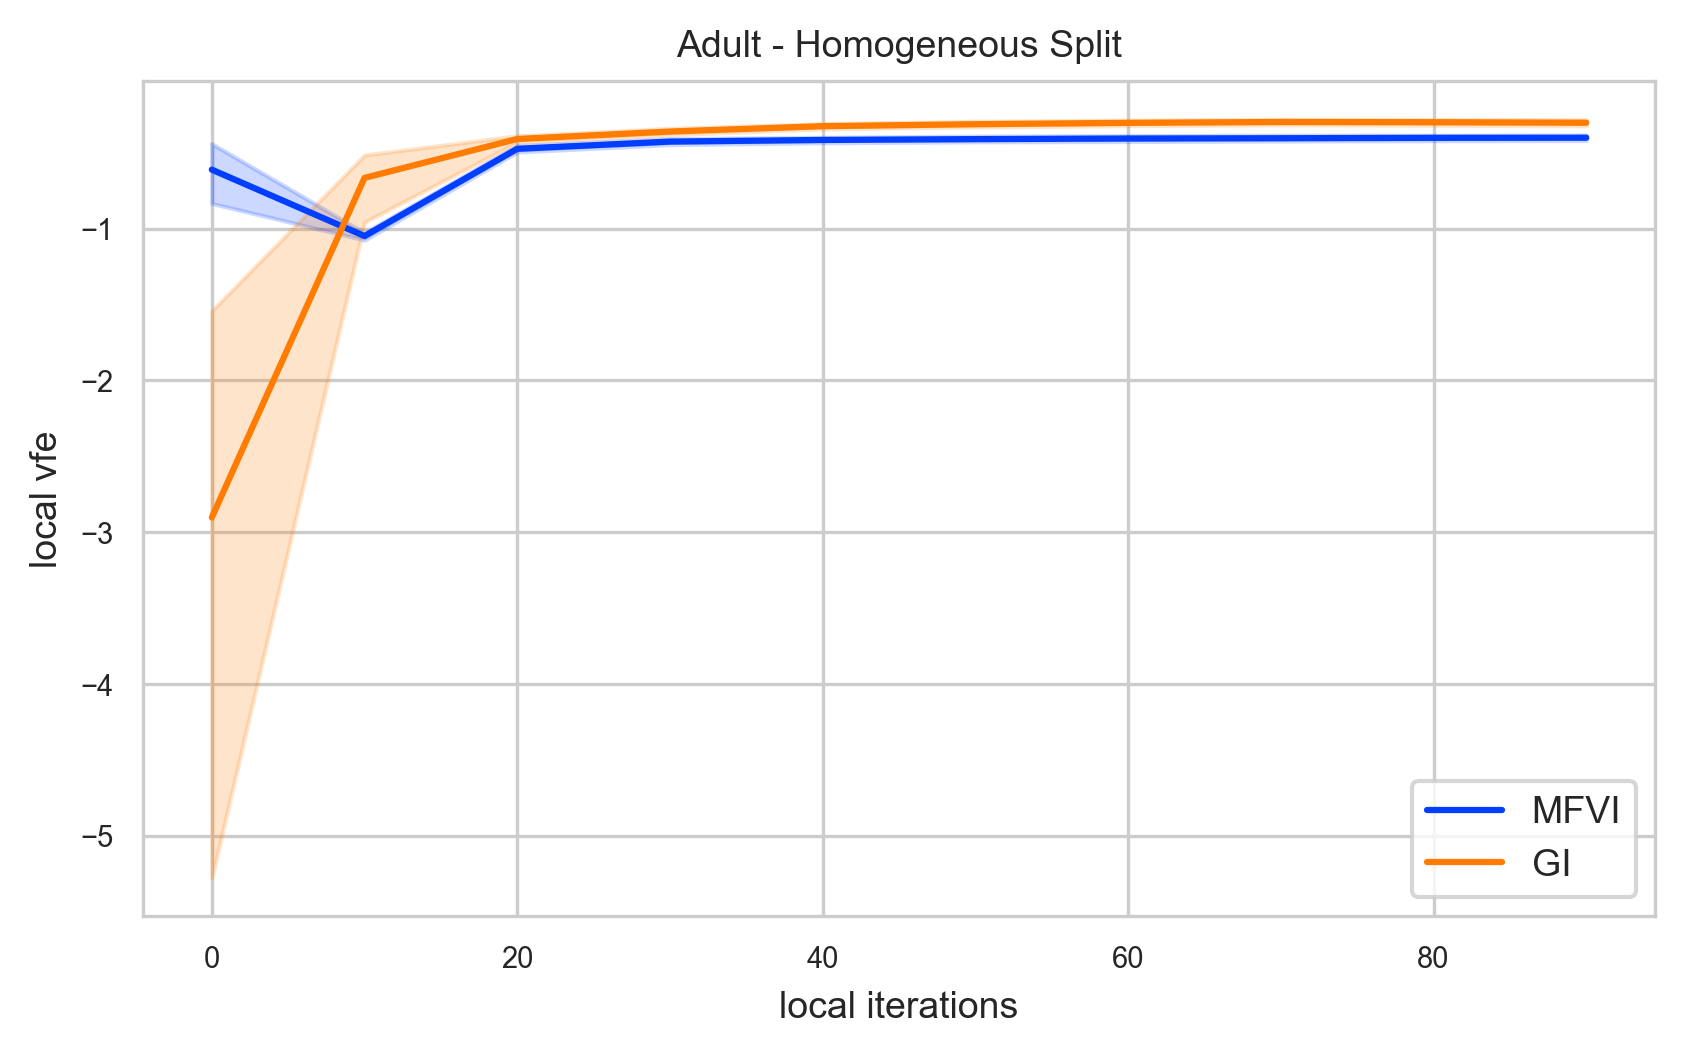

In [17]:
with plt.rc_context({**figsizes.neurips2022(ncols=1), **fontsizes.neurips2022()}):
    fig, ax = plt.subplots(1, 1)
    for k, d in logs.items():
        client0 = logs[k]['client0']
        sns.lineplot(x=client0.global_iteration, y=client0.vfe, label=f'{k}'.upper(), ax=ax)
    
    ax.set_title(f'{dataset} - Homogeneous Split - Global VI setting')
    ax.set_ylabel('local vfe')
    ax.set_xlabel('local iterations')
    ax.legend(loc="lower right", prop={"size": 9})
    plt.show()

In [8]:
# Load dictionary of vs state
# vs_path = os.path.join(exp_dir, "model/_vs.pt")
# vs_state_dict = torch.load(os.path.join(main_dir, vs_path))